In [ ]:
# loading data

In [2]:
import pandas as pd

# Loading data
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])

# Preview data
df.head()


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [3]:
# Shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Data types and non-null values
print("\nData types and non-null counts:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape of the dataset: (525600, 19)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int6

In [4]:
import numpy as np
from scipy import stats

# List of columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Create a boolean mask where True indicates rows without outliers
mask = (z_scores < 3).all(axis=1)

# Apply the mask to filter the DataFrame
df_cleaned = df[mask].copy()

# Display the number of rows removed
print(f"Rows removed due to outliers: {df.shape[0] - df_cleaned.shape[0]}")


Rows removed due to outliers: 16292


In [5]:
import numpy as np
from scipy import stats

# List of columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Create a boolean mask where True indicates rows without outliers
mask = (z_scores < 3).all(axis=1)

# Apply the mask to filter the DataFrame
df_cleaned = df[mask].copy()

# Display the number of rows removed
print(f"Rows removed due to outliers: {df.shape[0] - df_cleaned.shape[0]}")


Rows removed due to outliers: 16292


In [6]:
df_cleaned.set_index('Timestamp', inplace=True)

c:\Users\naima\Desktop\10Academy\solar-challenge-week1-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


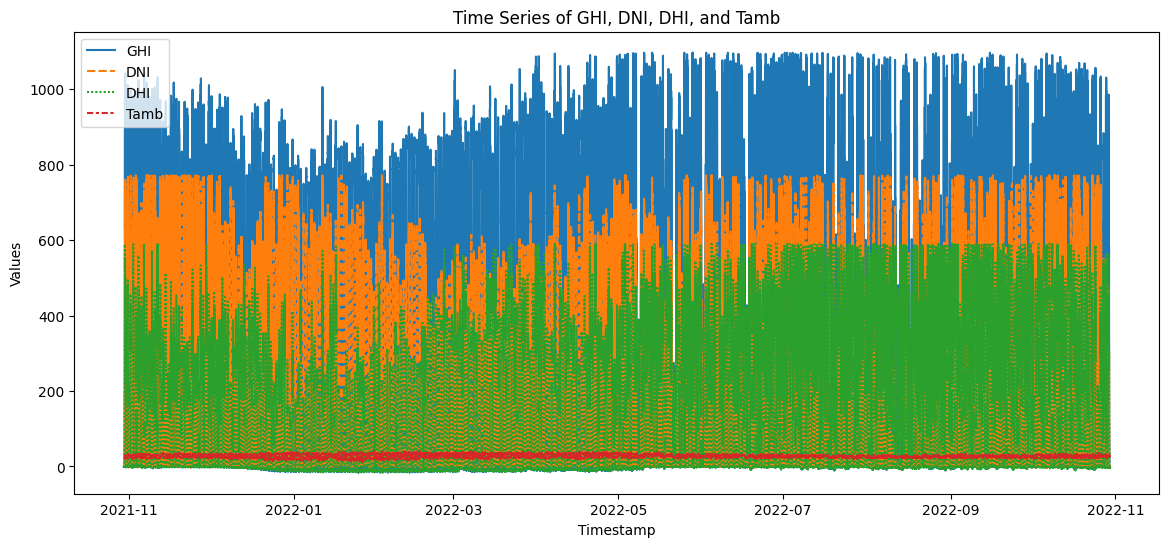

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot the time series data
sns.lineplot(data=df_cleaned[['GHI', 'DNI', 'DHI', 'Tamb']])

# Set plot title and labels
plt.title("Time Series of GHI, DNI, DHI, and Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Values")

# Display the plot
plt.show()


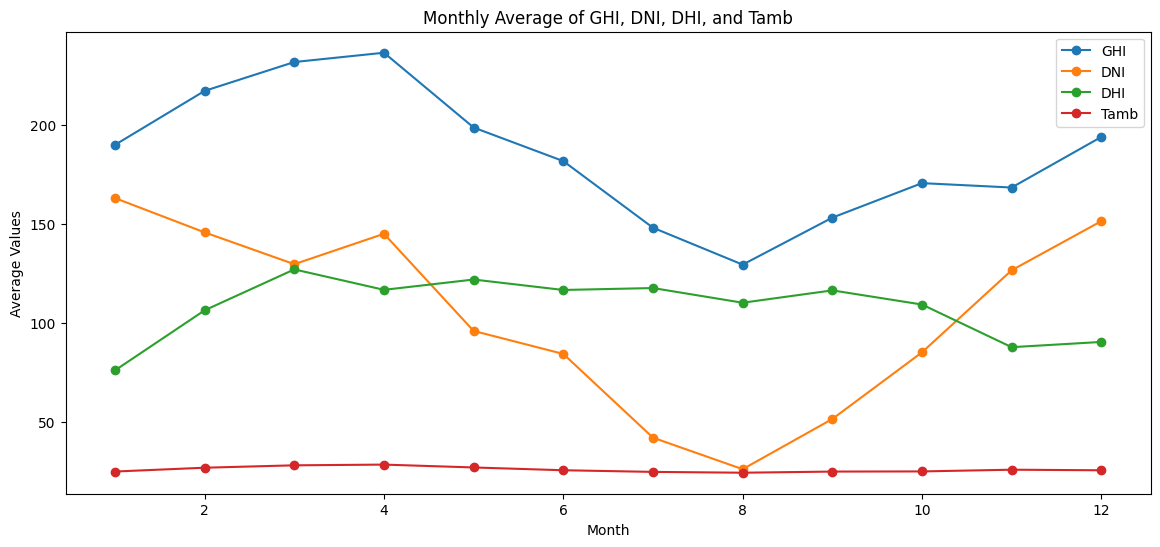

In [8]:
# Add a 'Month' column to the DataFrame
df_cleaned['Month'] = df_cleaned.index.month

# Calculate the monthly average for each variable
monthly_avg = df_cleaned.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot the monthly averages
monthly_avg.plot(kind='line', figsize=(14, 6), marker='o')

# Set plot title and labels
plt.title("Monthly Average of GHI, DNI, DHI, and Tamb")
plt.xlabel("Month")
plt.ylabel("Average Values")

# Display the plot
plt.show()


In [10]:
import matplotlib.pyplot as plt

# Group by 'Cleaning' and calculate mean of ModA and ModB
cleaning_impact = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Output by Cleaning Status')
plt.ylabel('Average Output')
plt.xticks(ticks=[0, 1], labels=['Not Cleaned', 'Cleaned'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


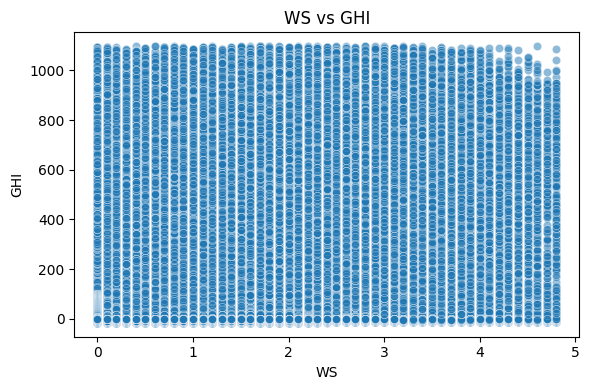

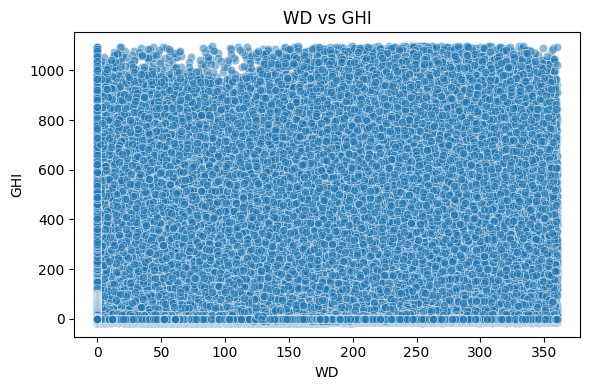

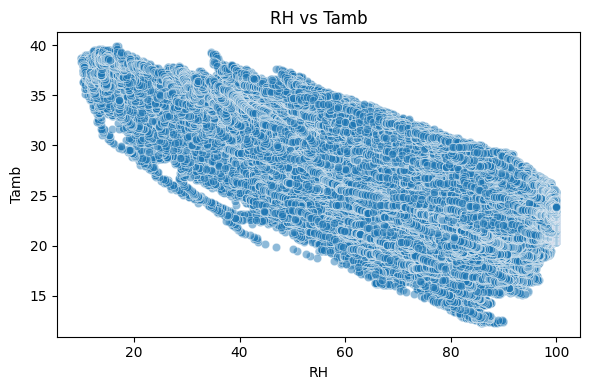

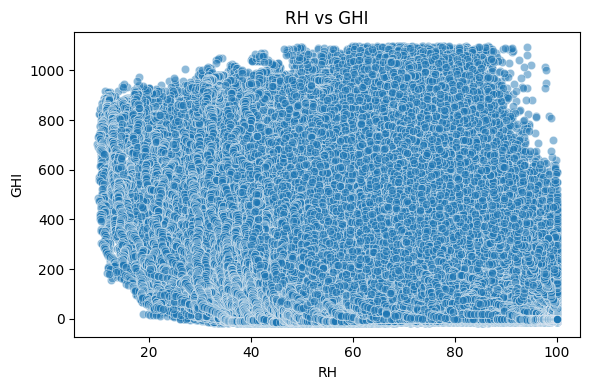

In [11]:
import seaborn as sns

# Select relevant columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_cleaned[corr_columns].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_cleaned, x=x, y=y, alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()


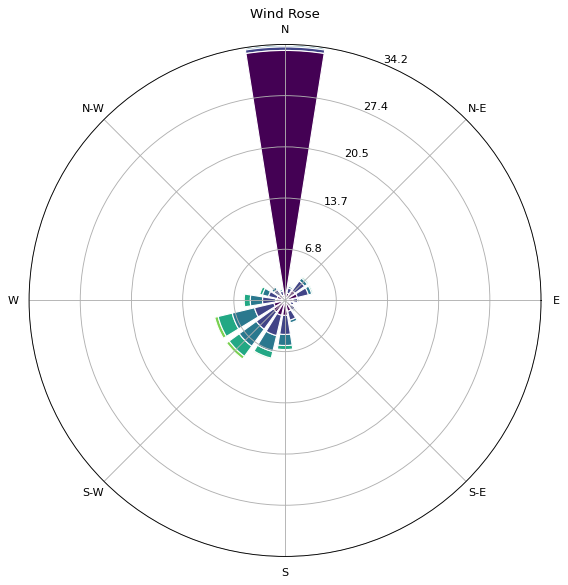

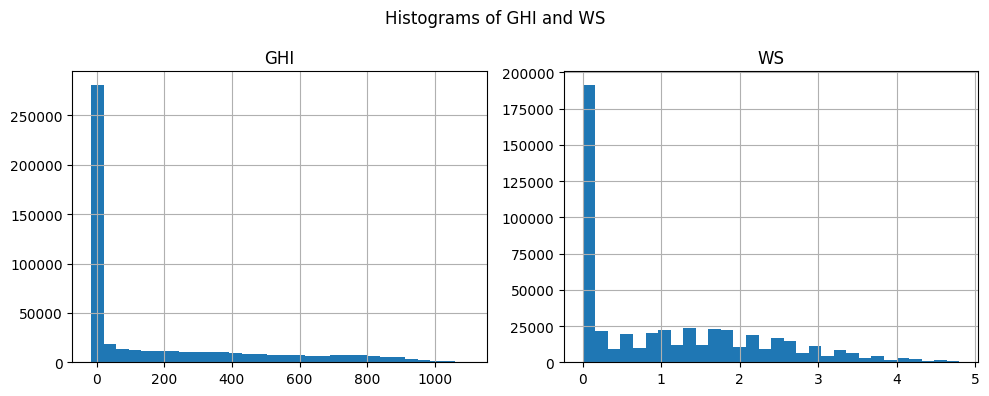

In [12]:
from windrose import WindroseAxes

# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose')
plt.show()

# Histograms
df_cleaned[['GHI', 'WS']].hist(bins=30, figsize=(10, 4))
plt.suptitle('Histograms of GHI and WS')
plt.tight_layout()
plt.show()


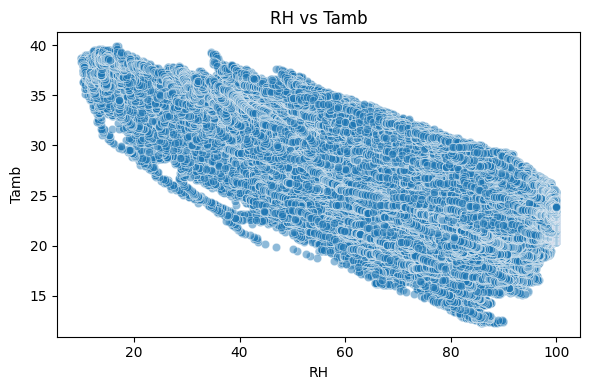

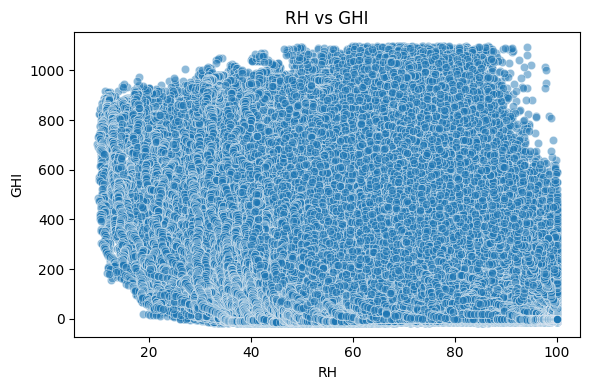

In [13]:
# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs Tamb')
plt.tight_layout()
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x='RH', y='GHI', alpha=0.5)
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()


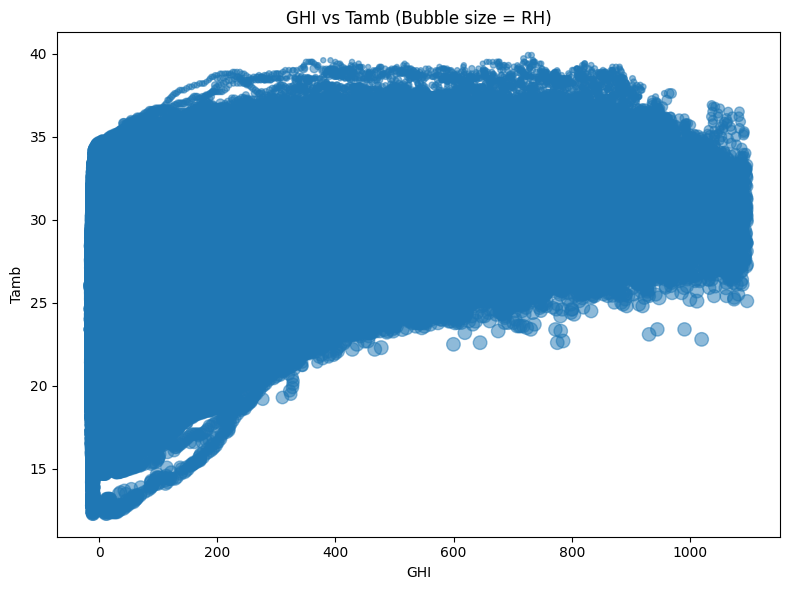

In [14]:
# Bubble chart: GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.tight_layout()
plt.show()


In [15]:
df_cleaned.to_csv('../data/sierraleone_clean.csv', index=False)
